In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

In [3]:
data = pd.read_csv('Resume.csv')

In [4]:
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
data.drop(columns = ['ID', 'Resume_html'], inplace = True)
data.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


## Cleaning

In [6]:
stemmer=  PorterStemmer()

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def preprocess(txt):
    txt = txt.lower() #convert all characters in lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt) #remove all non-english charaters
    txt = word_tokenize(txt) #split into words, will return a list 
    txt = [w for w in txt if not w in stopwords.words('english')] #remove all stop words
    txt = [stemmer.stem(w) for w in txt]
    return ' '.join(txt)

In [8]:
data['Resume'] = data['Resume_str'].apply(lambda x: preprocess(x))

In [9]:
data.drop(columns = ['Resume_str'], inplace = True)
data.head()

,Category,Resume
0,HR,hr administr market associ hr administr summar...
1,HR,hr specialist us hr oper summari versatil medi...
2,HR,hr director summari year experi recruit plu ye...
3,HR,hr specialist summari dedic driven dynam year ...
4,HR,hr manag skill highlight hr skill hr depart st...


## EDA

In [11]:
data.shape

(2484, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2484 non-null   object
 1   Resume    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [13]:
print(data['Category'].nunique())
data['Category'].unique()

24


array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

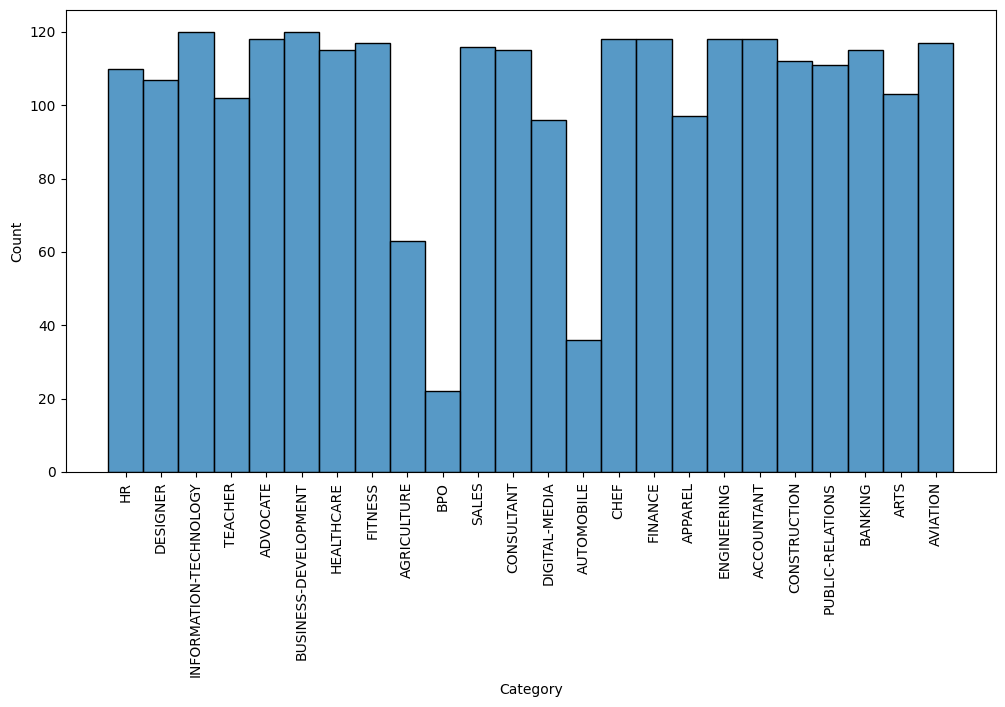

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data['Category'])
plt.xticks(rotation=90)
plt.show()

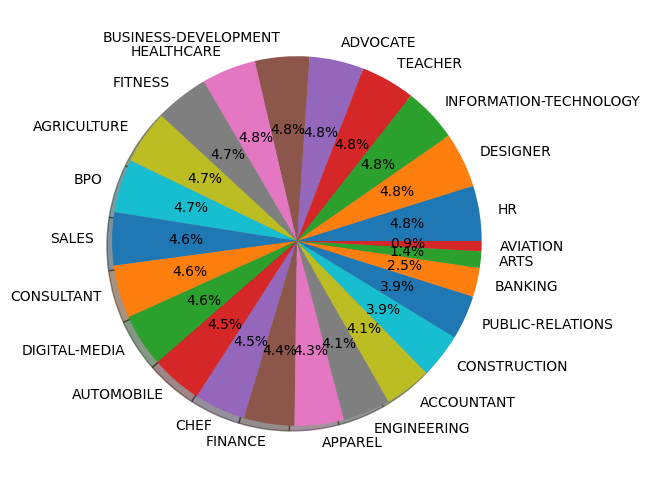

In [15]:
plt.figure(figsize=(15,6))
count=data['Category'].value_counts()
labels=data['Category'].unique()
plt.pie(count,labels=labels,shadow=True,autopct='%1.1f%%')
plt.show()

In [16]:
data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

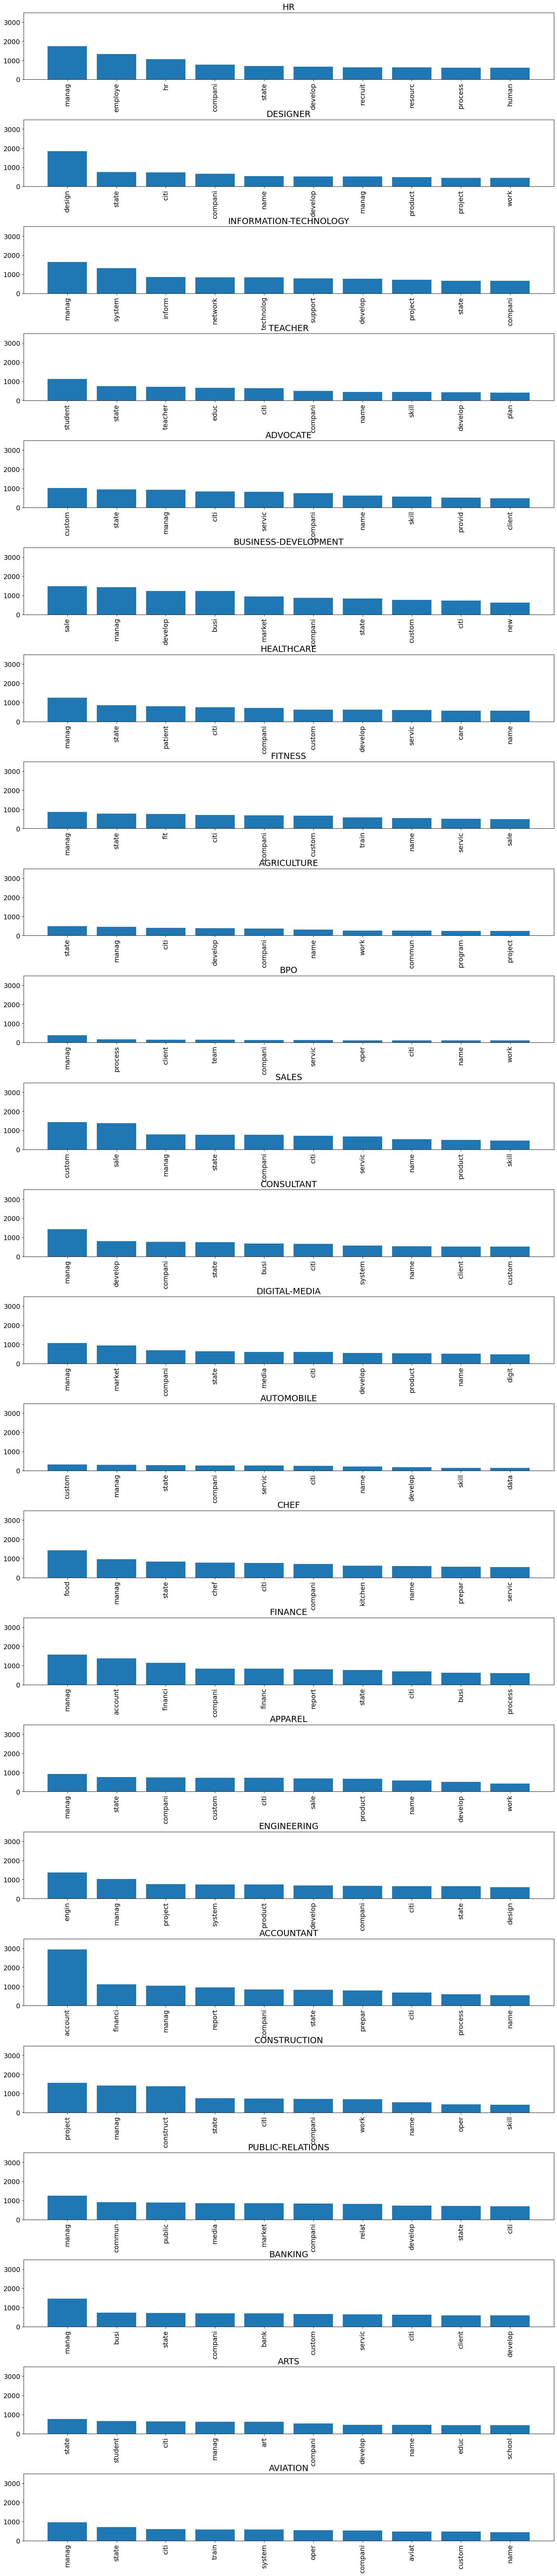

In [18]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']
    return count.head(10)

# Get the unique categories
categories = data['Category'].unique()

# Plot configuration
fig = plt.figure(figsize=(20, len(categories) * 4))  # Adjust height dynamically based on categories

for i, category in enumerate(categories):
    # Filter the DataFrame for the current category
    category_data = data[data['Category'] == category]
    
    # Get word frequencies for this category
    wf = wordfreq(category_data)
    
    # Create a subplot
    ax = fig.add_subplot(len(categories), 1, i + 1)
    ax.set_title(category, fontsize=18)
    
    # Plot the bar chart
    ax.bar(wf['Word'], wf['Frequency'])
    ax.set_ylim(0, 3500)
    ax.set_xticks(range(len(wf['Word'])))
    ax.set_xticklabels(wf['Word'], fontsize=14, rotation=90)
    ax.tick_params(axis='y', labelsize=14)

plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

## Balancing

In [10]:
from sklearn.utils import resample

max_count=data['Category'].value_counts().max()

balancing_data=[]
for i in data['Category'].unique():
    cate_data=data[data['Category']==i]
    if len(cate_data)<max_count:
        bcd=resample(cate_data,replace=True,n_samples=max_count,random_state=42)
    else:
        bcd=resample(cate_data,replace=False,n_samples=max_count,random_state=42)
    balancing_data.append(bcd)

data=pd.concat(balancing_data)    

In [11]:
data['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

## Training

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data['Category']=encoder.fit_transform(data['Category'])

In [18]:
import pickle

pickle.dump(encoder, open('label_encoder.pkl', 'wb'))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data['Resume']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [16]:
with open('tfidf_categorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = accuracy_score(y_test,pr)
    pre_score = precision_score(y_test,pr,average="weighted")
    recall= recall_score(y_test,pr,average="weighted")
    f1= f1_score(y_test,pr,average="weighted")
    return acc_score,pre_score,recall,f1


acc_score = {}
pre_score = {}
recall_scores={}
f1_scores={}

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, BaggingClassifier,GradientBoostingClassifier


lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=10)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

clfs= {
    'Logistic Regression':lg,
    'SVM':sv,
    'Decision Tree':dtc,
    'KNN':knn,
    'Random Forest':rfc,
    'Extra Trees':etc,
    'Bagging':bg,
    'Gradient Boosting':gbc,
}

for name,clf in clfs.items():
    acc_score[name],pre_score[name],recall_scores[name],f1_scores[name] = score_prediction(clf,X_train,X_test,y_train,y_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
df= pd.DataFrame({
    'Accuracy' : acc_score,
    'Precision' : pre_score,
    'Recall' : recall_scores,
    'F1 Score' : f1_scores
})

df.head(8)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.682292,0.693265,0.682292,0.682268
SVM,0.772569,0.791358,0.772569,0.772691
Decision Tree,0.381944,0.565996,0.381944,0.397756
KNN,0.581597,0.590445,0.581597,0.571979
Random Forest,0.833333,0.842030,0.833333,0.833563
Extra Trees,0.826389,0.846035,0.826389,0.829590
Bagging,0.843750,0.844397,0.843750,0.839993
Gradient Boosting,0.840278,0.846723,0.840278,0.839942


In [76]:
param_grid = { 
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.05, 0.1, 0.25, 0.5],
        'max_depth': [3, 5, 7]
    }

In [75]:
from sklearn.model_selection import GridSearchCV

def apply_grid_search(X_train, X_test, y_train, y_test, param_grid):
   
    model = GradientBoostingClassifier(random_state=2)
    
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_score', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    
    acc_score1 = accuracy_score(y_test, y_pred)
    pre_score1 = precision_score(y_test, y_pred)
    rec_1 = recall_score(y_test, y_pred)
    f1_1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc_score1}")
    print(f"Precision: {pre_score1}")
    print(f"Recall: {rec_1}")
    print(f"F1 Score: {f1_1}")
    
    
apply_grid_search(X_train, X_test, y_train, y_test, param_grid)


Accuracy: 0.921875
Precision: 0.925321846026612
Recall: 0.921875
F1 Score: 0.9217691005038559


In [25]:
with open('model.pkl', 'wb') as file:
    pickle.dump(gbc, file)